In [1]:
import ROOT, os, sys, glob
from math import *
ROOT.EnableImplicitMT(4); #implicit multi threading is used to introduce parallelicity of running the program

Welcome to JupyROOT 6.28/00


In [2]:
list(glob.glob("/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/*125X_v0.0.root"))

['/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_BsToMuMu_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_DYToLL_M-10To50_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_DYToLL_M-1To10_TuneCP5_14TeV-pythia8_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_DYToLL_M-50_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M15_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M2_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M5_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_JPsiToMuMu_PU200.125X_v0.0.root',
 '/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_SingleNeutrino_PU200.125X_v0.0.root']

In [3]:
list(glob.glob("/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M15_PU200.125X_v0.0.root")) #this line is useless

['/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M15_PU200.125X_v0.0.root']

In [4]:
rdf = ROOT.RDataFrame("Events", "/eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M15_PU200.125X_v0.0.root")
#in this we are taking the events of only "l1MuNano_HAHM_ZdToMuMu_M15_PU200", ask about this

In [5]:
rdf.Describe()#this fucntion is used to list out the elements in rdf

Dataframe from TChain Events in file /eos/cms/store/cmst3/group/l1tr/gpetrucc/dilep-scout/l1MuNano_HAHM_ZdToMuMu_M15_PU200.125X_v0.0.root

Property                Value
--------                -----
Columns in total           34
Columns from defines        0
Event loops run             0
Processing slots            4

Column          Type                            Origin
------          ----                            ------
GenMu_charge    ROOT::VecOps::RVec<Int_t>       Dataset
GenMu_d0        ROOT::VecOps::RVec<Float_t>     Dataset
GenMu_eta       ROOT::VecOps::RVec<Float_t>     Dataset
GenMu_isFromTau ROOT::VecOps::RVec<Int_t>       Dataset
GenMu_isPrompt  ROOT::VecOps::RVec<Int_t>       Dataset
GenMu_mass      ROOT::VecOps::RVec<Float_t>     Dataset
GenMu_phi       ROOT::VecOps::RVec<Float_t>     Dataset
GenMu_pt        ROOT::VecOps::RVec<Float_t>     Dataset
GenMu_vz        ROOT::VecOps::RVec<Float_t>     Dataset
TkMu_GenMuFlav  ROOT::VecOps::RVec<UChar_t>     Dataset
TkMu_GenMu

Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


Processed 10000 entries.


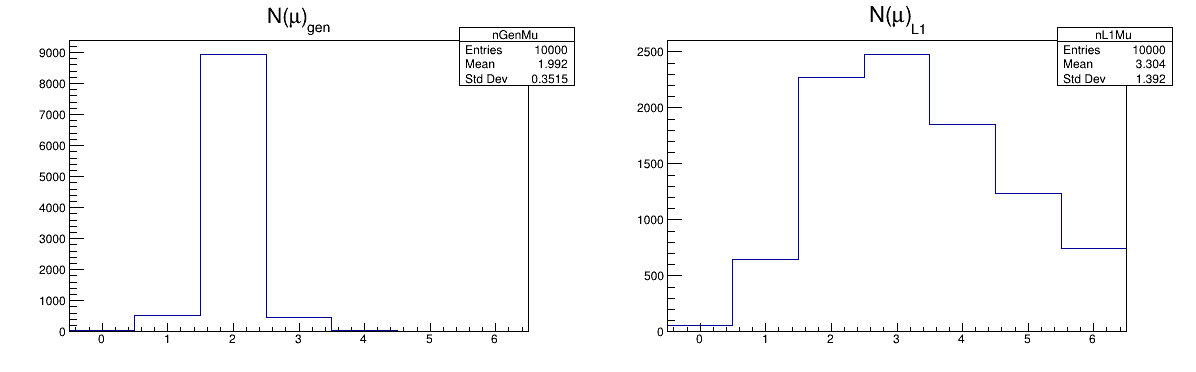

In [6]:
#"https://root.cern.ch/doc/master/group__tutorial__dataframe.html"  refer to this for more details about the dataframe histo1D
## Now we make a plot of the number of generated muons and the ones reconstructed by L1T

hNGen = rdf.Histo1D(("nGenMu","N(#mu)_{gen}",7,-0.5,6.5), "nGenMu")
# rdf.Histo1D(("<for the std>","<title of the graph>",7,-0.5,6.5), "<dataset which is plotted, this is a column  in the rdf>")

hNL1 = rdf.Histo1D(("nL1Mu","N(#mu)_{L1}",7,-0.5,6.5), "nTkMu")
entries = rdf.Count().GetValue()
print(f"Processed {entries} entries.")

##what us nGenmu and nTkmu

## And plot it
c1 = ROOT.TCanvas("c1","c1", 1200, 400)
c1.Divide(2,1) #divides the page into two columns for diplay
c1.cd(1)
hNGen.Draw()
c1.cd(2)
hNL1.Draw()
c1.Draw()

Processed 10000 entries.


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


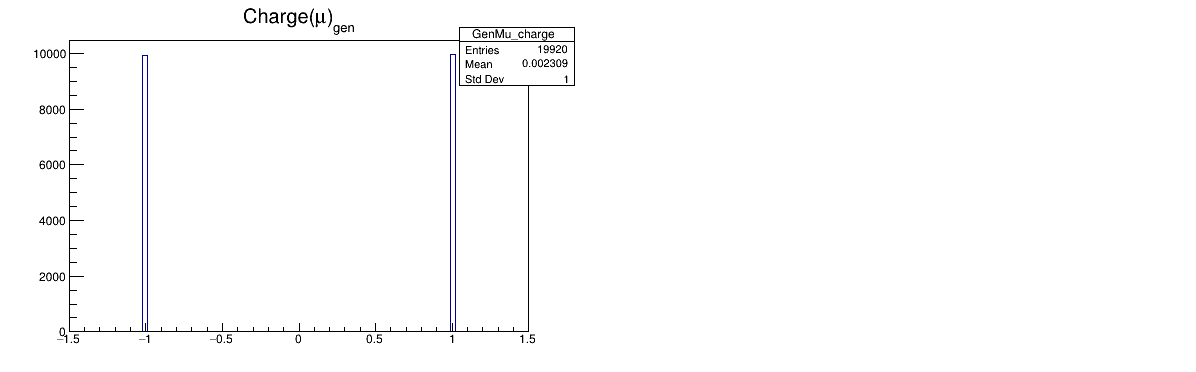

In [7]:
hGenMu_charge = rdf.Histo1D(("GenMu_charge","Charge(#mu)_{gen}",100,-1.5,1.5),"GenMu_charge")
entries_1 = rdf.Count().GetValue()
print(f"Processed {entries_1} entries.")

#some things about the genMu charge- each entry /event recorded produced on an average 1.992 muons as inferred from the graph above. 1.992 x 10000 is the total number of entries plotted in the histogram.




c1= ROOT.TCanvas("c1","c1",1200,400)
c1.Divide(2,1) 
c1.cd(1)
hGenMu_charge.Draw()
c1.Draw()


In [8]:
rdf.Display(["GenMu_charge"],100).Print() #this is to display the dataset. this cannot happein wiht the implicitMT on

TypeError: Template method resolution failed:
  none of the 3 overloaded methods succeeded. Full details:
  ROOT::RDF::RResultPtr<ROOT::RDF::RDisplay> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Display(initializer_list<string> columnList, unsigned long nRows = 5, unsigned long nMaxCollectionElements = 10) =>
    TypeError: could not convert argument 1
  ROOT::RDF::RResultPtr<ROOT::RDF::RDisplay> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Display(const vector<string>& columnList, unsigned long nRows = 5, unsigned long nMaxCollectionElements = 10) =>
    runtime_error: Display was called with ImplicitMT enabled, but multi-thread is not supported.
  ROOT::RDF::RResultPtr<ROOT::RDF::RDisplay> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Display(basic_string_view<char,char_traits<char> > columnNameRegexp = "", unsigned long nRows = 5, unsigned long nMaxCollectionElements = 10) =>
    TypeError: could not convert argument 1
  ROOT::RDF::RResultPtr<ROOT::RDF::RDisplay> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Display(initializer_list<string> columnList, unsigned long nRows = 5, unsigned long nMaxCollectionElements = 10) =>
    TypeError: could not convert argument 1

In [ ]:
# # Now we make pairs of muons
# ## This needs a bit of inlined C++ code
# def makeDimuonPairs(name, rdf):
#     ## define 4-vectors in cartesian coordinates, for easier 
#     rdf = rdf.Define(f"{name}Mu_p4", f"ROOT::VecOps::Construct<ROOT::Math::XYZTVector>(ROOT::VecOps::Construct<ROOT::Math::PtEtaPhiMVector>({name}Mu_pt,{name}Mu_eta,{name}Mu_phi,{name}Mu_mass))")
#     #rdf = rdf.Define(f"{name}Mu_p4", f"(ROOT::VecOps::Construct<ROOT::Math::PtEtaPhiMVector>({name}Mu_pt,{name}Mu_eta,{name}Mu_phi,{name}Mu_mass))") this is just he above line bu the conversion of cylindircal co-ordinates to carteshian coordinates hasnt been done and this significantly slows dowon the processing

#     ## make indices of all the pairs
#     rdf = rdf.Define(f"{name}DiMu_indices", f"""
#         std::vector<std::pair<int,int>> ret; 
#         for (int i = 0, n = n{name}Mu; i < n; ++i) 
#             for (int i2 = i+1; i2 < n; ++i2) 
#             if()
#                 ret.emplace_back(i,i2); 
#         return ret;""") 

#     #emplace is used to append a avlue into a set in C++
#     # std::vector<std::pair<int,int>> ret;  std is used to define a set in C++
    
    
    
#     ## Make the number of dimuons, for convenience later
#     rdf = rdf.Define(f"n{name}DiMu", f"{name}DiMu_indices.size()")
#     ## compute the mass, charge
#     rdf = rdf.Define(f"{name}DiMu_mass", f"""
#         ROOT::RVecF ret; 
#         for (const auto & pair : {name}DiMu_indices) 
#             ret.emplace_back(({name}Mu_p4[pair.first]+{name}Mu_p4[pair.second]).M());
#         return ret;""")
#     rdf = rdf.Define(f"{name}DiMu_charge", f"""
#         ROOT::RVecI ret; 
#         for (const auto & pair : {name}DiMu_indices) 
#             ret.emplace_back({name}Mu_charge[pair.first]+{name}Mu_charge[pair.second]);
#         return ret;""")
#     ## compute pt 
#     rdf= rdf.Define(f"{name}DiMu_pt",f"""ROOT::RVecF ret;
#     for (const auto & pair : {name}DiMu_indices) 
#         ret.emplace_back({name}Mu_pt[pair.first]+{name}Mu_pt[pair.second]);
#     return ret;""")
#     return rdf; #RVecF impies to create a root vector of float type

# #what does for(const auto&pair mean)

# rdf_gendimu = makeDimuonPairs("Gen", rdf)


# ## Now we make a plot of the number of generated muons and the ones reconstructed by L1T
# hNGenPairs = rdf_gendimu.Histo1D(("nGenDiMu","N(#mu#mu)_{gen};N(#mu#mu)_{gen};Events",7,-0.5,6.5), "nGenDiMu")
# hGenPairMass = rdf_gendimu.Histo1D(("GenMass","m(#mu#mu)_{gen};m (GeV);Pairs",100,0.0,20.0), "GenDiMu_mass")
# hGenPairCharge = rdf_gendimu.Histo1D(("GenCharge","q(#mu#mu)_{gen};q(#mu_{1}) + q(#mu_{2});Pairs",7,-3.5,3.5), "GenDiMu_charge")
# hGenPairPt = rdf_gendimu.Histo1D(("GenPt","p_{T}(#mu#mu)_{gen};p_{T}(GeV);Pairs",100,-10,60),"GenDiMu_pt")
# entries = rdf_gendimu.Count().GetValue()
# print(f"Processed {entries} entries.")
# ## And plot it
# c2 = ROOT.TCanvas("c2","c2", 1500, 400)
# c2.Divide(4,1)
# for i, h in enumerate([hNGenPairs,hGenPairMass,hGenPairCharge,hGenPairPt]):
#     c2.cd(i+1)
#     h.Draw()
# c2.Draw()

In [ ]:
# #let us do the same for L1 reconstructed muon pairs
# rdf_tkdimu = makeDimuonPairs("Tk", rdf_gendimu)


# ## Now we make a plot of the number of generated muons and the ones reconstructed by L1T
# hNtkPairs = rdf_tkdimu.Histo1D(("nTkDiMu","N(#mu#mu)_{gen};N(#mu#mu)_{gen};Events",7,-0.5,6.5), "nTkDiMu")
# htkPairMass = rdf_tkdimu.Histo1D(("TkMass","m(#mu#mu)_{gen};m (GeV);Pairs",100,0.0,20.0), "TkDiMu_mass")
# htkPairCharge = rdf_tkdimu.Histo1D(("TkCharge","q(#mu#mu)_{gen};q(#mu_{1}) + q(#mu_{2});Pairs",7,-3.5,3.5), "TkDiMu_charge")
# htkPairPt = rdf_tkdimu.Histo1D(("TkPt","p_{T}(#mu#mu)_{gen};p_{T}(GeV);Pairs",100,-10,60),"TkDiMu_pt")
# entries = rdf_tkdimu.Count().GetValue()
# print(f"Processed {entries} entries.")
# ## And plot it
# c2 = ROOT.TCanvas("c2","c2", 1500, 400)
# c2.Divide(4,1)
# for i, h in enumerate([hNtkPairs,htkPairMass,htkPairCharge,htkPairPt]):
#     c2.cd(i+1)
#     h.Draw()
# c2.Draw()


In [ ]:
# def dimuonextra(name,rdf):
#     #separation along the beamline
#     rdf=rdf.Define(f"{name}DiMu_dz",f"""
#     ROOT::RVecF ret;
#     for(const auto & pair : {name}DiMu_indices)
#         ret.emplace_back(({name}Mu_vz[pair.first]-{name}Mu_vz[pair.second]));
#     return ret;""")
#     #min pT of thw two
#     rdf = rdf.Define(f"{name}Mu_minPT",f"""
#     ROOT::RVecF ret;
#     for(const auto & pair : {name}DiMu_indices)
#         ret.emplace_back(std::min({name}Mu_pt[pair.first],{name}Mu_pt[pair.second]));
#     return ret;""") #
    
#     return rdf;
# rdf_tkextra = dimuonextra("Tk", dimuonextra("Gen", rdf_tkdimu)) #this is done to essentially include all the newly created Rdfs in the final rdf
# hTkPair_Dz = rdf_tkextra.Histo1D(("TkPair_dz","dz(#mu#mu)_{Tk};cm",100,-10,10),"TkDiMu_dz")
# hTkPair_minPt = rdf_tkextra.Histo1D(("TkPair_minPt","min p_{T}(#mu#mu)_{Tk};GeV",100,0,10),"TkMu_minPT")
# hGenPair_Dz = rdf_tkextra.Histo1D(("GenPair_dz","dz(#mu#mu)_{Gen};cm",100,-10,10),"GenDiMu_dz")
# hGenPair_minPt = rdf_tkextra.Histo1D(("GenPair_minPt","min p_{T}(#mu#mu)_{Gen};GeV",100,0,10),"GenMu_minPT")


# entries = rdf_tkdimu.Count().GetValue()
# print(f"Processed {entries} entries.")
# ## And plot it
# c2 = ROOT.TCanvas("c2","c2", 1200, 800)
# c2.Divide(2,2)
# for i, h in enumerate([hTkPair_Dz, hTkPair_minPt, hGenPair_Dz, hGenPair_minPt]):
#     c2.cd(i+1)
#     h.Draw()
# c2.Draw()

# def makeMoreDimuonVariables(name, rdf):
#     ## compute the separation along the beam line
#     rdf = rdf.Define(f"{name}DiMu_dz", f"""
#         ROOT::RVecF ret; 
#         for (const auto & pair : {name}DiMu_indices) 
#             ret.emplace_back(({name}Mu_vz[pair.first]-{name}Mu_vz[pair.second]));
#         return ret;""")
#     rdf = rdf.Define(f"{name}DiMu_minPt", f"""
#         ROOT::RVecF ret; 
#         for (const auto & pair : {name}DiMu_indices) 
#             ret.emplace_back(std::min({name}Mu_pt[pair.first],{name}Mu_pt[pair.second]));
#         return ret;""")
#     return rdf;

# rdf_dimu = makeMoreDimuonVariables("Tk", makeMoreDimuonVariables("Gen", rdf_tkdimu))
# ## Now we make a plot of the number of generated muons and the ones reconstructed by L1T
# hGenPairDZ = rdf_dimu.Histo1D(("GenDZ","dz(#mu#mu)_{L1};z(#mu_{1}) - z(#mu_{2}) (cm);Pairs",100,-10,10), "GenDiMu_dz")
# hL1PairDZ = rdf_dimu.Histo1D(("TkDZ","dz(#mu#mu)_{L1};z(#mu_{1}) - z(#mu_{2}) (cm);Pairs",100,-10,10), "TkDiMu_dz")
# hGenPairMinPt = rdf_dimu.Histo1D(("GenMinPt","min p_{T} (Gen);min(p_{T}(#mu_{1}), p_{T}(#mu_{2})) (GeV);Pairs",100,0,10), "GenDiMu_minPt")
# hL1PairMinPt = rdf_dimu.Histo1D(("TkMinPt","min p_{T} (L1);min(p_{T}(#mu_{1}), p_{T}(#mu_{2})) (GeV);Pairs",100,0,10), "TkDiMu_minPt")
# entries = rdf_dimu.Count().GetValue()
# print(f"Processed {entries} entries.")
# ## And plot it
# c1 = ROOT.TCanvas("c1","c1", 1200, 800)
# c1.Divide(2,2)
# for i, h in enumerate([hGenPairDZ,hL1PairDZ,hGenPairMinPt,hL1PairMinPt]):
#     c1.cd(i+1)
#     h.Draw()
# c1.Draw()


